# Лабораторная работа №3

## Часть I. Нелинейное уравнение

In [5]:
import numpy as np

epsilon = 1e-6

### Введение норм и вспомогательных методов

In [6]:
def norm(x):
  norm = 0.0
  for i in range(x.shape[0]):
    val = np.abs(x[i])
    if val > norm:
      norm = val
  return norm

def extract_col(vec):
  return vec[:,0]

В качестве условия возьмем уравнение из номера IV.12.4 пункт (к):
$\ln(x) + (x-1)^3 = 0$

Выберем подходящий метод для проведения метода простой итерации:

1) $x_{k+1} = \exp(-(x_{k}-1)^3)$

2) $x_{k+1} = -\sqrt[3] {\ln(x_{k})} + 1$

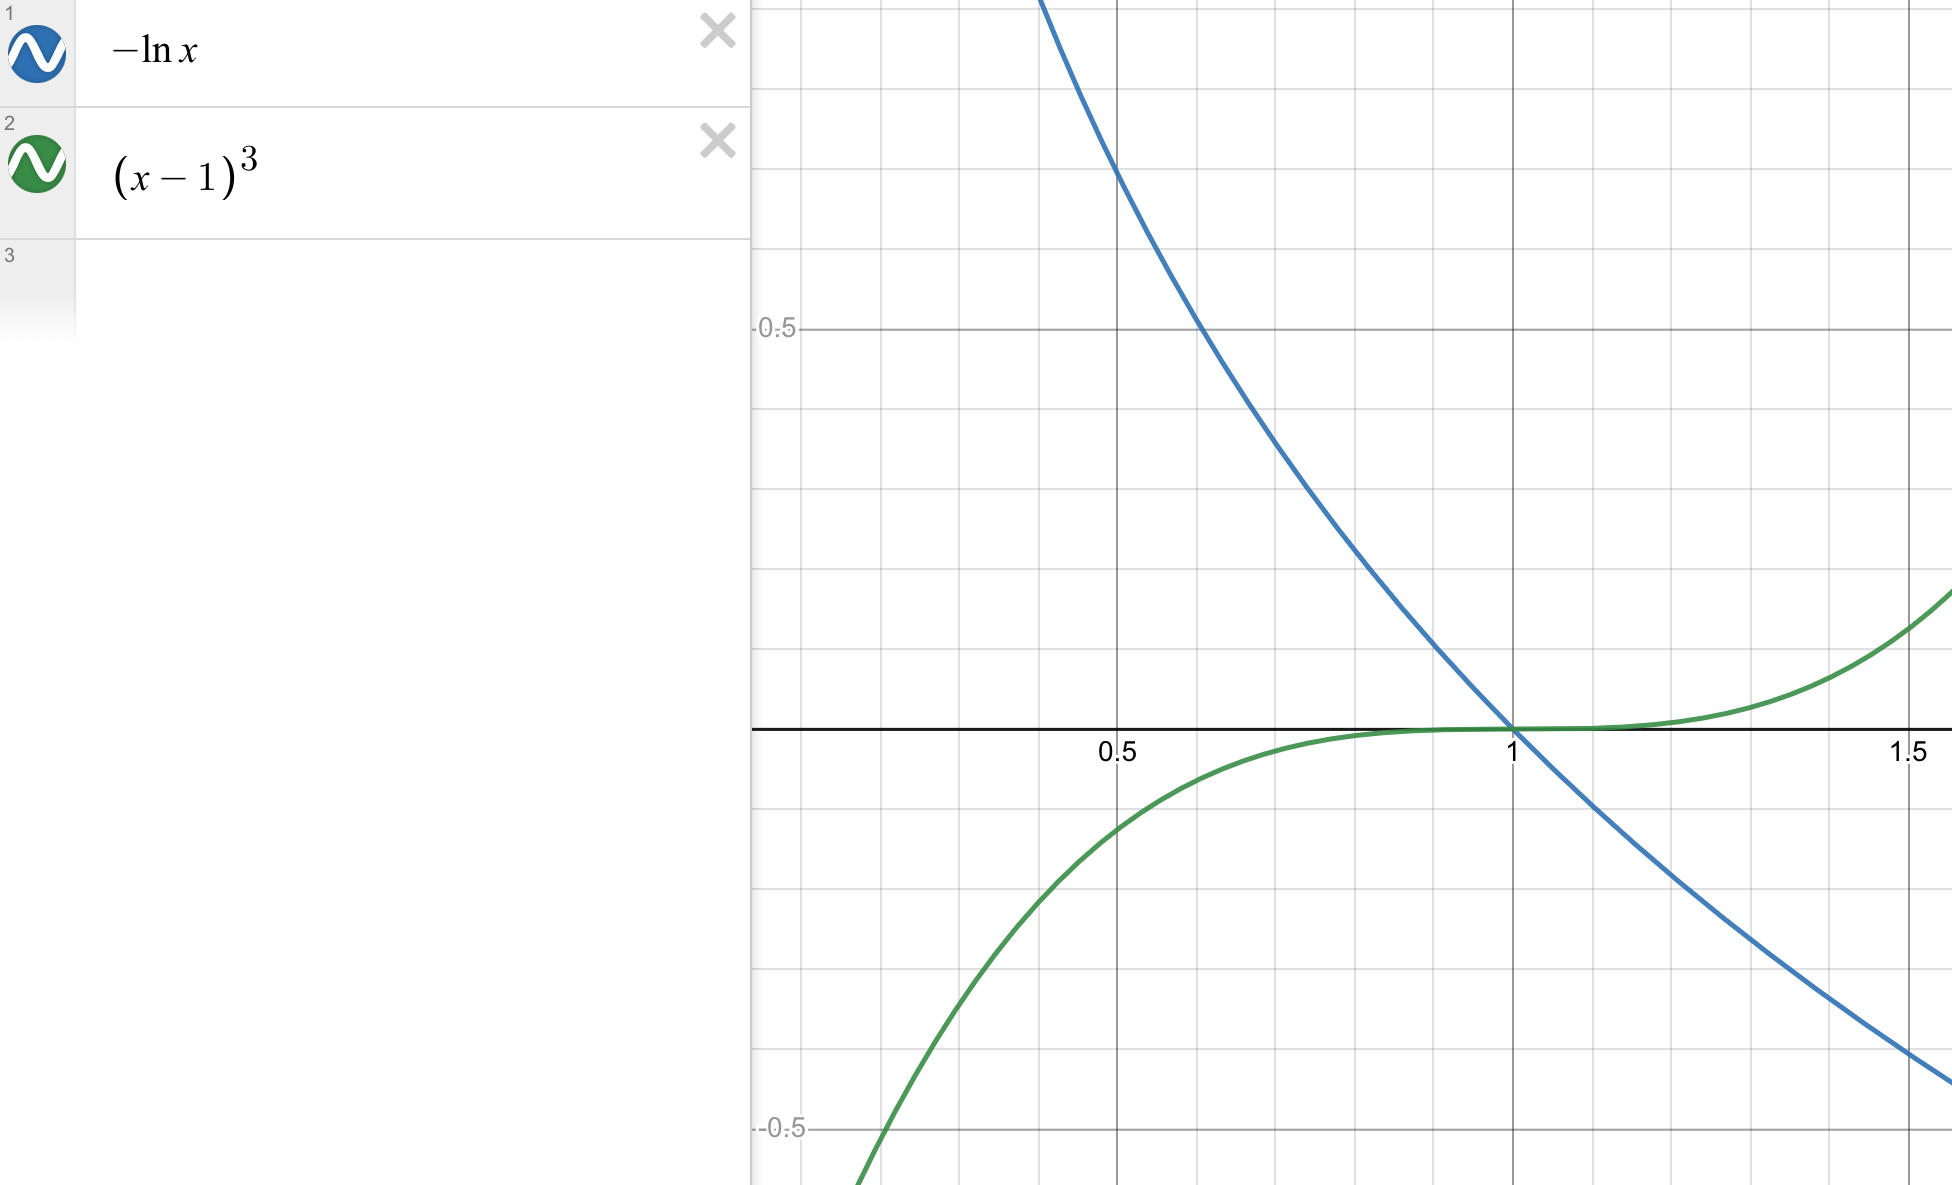

Выберем область локализации, исходя из графика.

Возьмём в качестве области локализации отрезок: $[0.5, 1.5]$. Теперь вычислим первые производные для функций, задающих итерационный процесс в двух методах.

1) $\phi'(x) = -3(x-1)^2\exp(-(x-1)^3)$

2) $\phi'(x) = -\dfrac{1}{3x\sqrt[3]{\ln^2(x)}}$

Метод 2 не подходит, т. к. при $x=0$ функция стремится к бесконечности. А вот метод 1 подходит, т. к. значения производной меньше единицы на всей области локализации: $|\phi'(0.5)|\approx 0.85$, $|\phi'(1.5)|\approx 0.66 $, а так как функция имеет локальный минимум в точке $x = 1$,то максимальное значение функции в области локализации будет равно $\phi'(0.5)\approx 0.85$, отсюда $\phi'(x) \le q = 0.9 < 1$.

In [7]:
def phi(x):
  return np.exp(-np.power(x-1,3))

In [8]:
def msi(func, x0, epsilon):
  x = x0
  step = 0
  while(True):
    cur = x
    x = func(x)
    if step > 1:
      q = (x-cur)/(cur-prev)
      if (x - cur) <= (epsilon * (1-q)):
        break
    prev = cur
    step += 1
  return x

In [9]:
x = msi(phi, 0.7, epsilon)
print("Solution of equation is", x)

Solution of equation is 1.0


## Часть II. Система нелинейных уравнений

В качестве примера возьмем пример из IV.12.5 (в):

\begin{cases}
\cos(x-1)+y=0.5,
\\
x-\cos y=3.
\end{cases}
Или,
\begin{cases}
\cos(x-1)+y-0.5=0,
\\
x-\cos y -3=0.
\end{cases}

Построим матрицу Якоби данной системы:
\begin{equation}
\mathcal{J} =
\begin{pmatrix}
\dfrac{\partial F_1}{\partial x} & \dfrac{\partial F_1}{\partial y}\\
\dfrac{\partial F_2}{\partial x} & \dfrac{\partial F_2}{\partial y}
\end{pmatrix}
\end{equation}
где $F_1 = \cos(x-1) + y - 0.5$ и $F_2 = x-\cos y - 3$

Отсюда, высчитаем элементы матрицы Якоби:
\begin{equation}
\mathcal{J} =
\begin{pmatrix}
-\sin (x-1) & 1\\
1 & \sin y
\end{pmatrix}
\end{equation}

Обратная же матрица Якоби представляется в виде:
\begin{equation}
\mathcal{J}^{-1} = \dfrac{1}{\sin (x-1)\cdot\sin y + 1}
\begin{pmatrix}
-\sin y & 1\\
1 & \sin (x-1)\\
\end{pmatrix}
\end{equation}

In [10]:
def yacob(column):
  x = column[0]
  y = column[1]
  matr = np.array([[0,0],[0,0]])
  coeff = np.sin(x-1)*np.sin(y) + 1
  matr[0,0] = np.sin(y) * (-1)
  matr[0,1] = 1
  matr[1,0] = 1
  matr[1,1] = np.sin(x-1)
  matr = matr/coeff
  return matr

In [11]:
def func_x(column):
  x = column[0]
  y = column[1]
  return np.cos(x-1) + y - 0.5

def func_y(column):
  x = column[0]
  y = column[1]
  return x - np.cos(y) - 3

def func(column):
  return np.array([[func_x(column)], [func_y(column)]])

In [12]:
def mnew(x0, yacob, func, epsilon):
  x = x0
  while(True):
    cur = x
    x = x - np.matmul(yacob(x), func(extract_col(x)))
    if(norm(extract_col(x)-extract_col(cur)) < epsilon):
      break
  return x

In [13]:
x0 = np.array([[1], [1]])
x = mnew(x0, yacob, func, epsilon)
x = x[:,0]
print("The solution of this exuation is the point in 2d space: ")
print("x = ", x[0])
print("y = ", x[1])

The solution of this exuation is the point in 2d space: 
x =  3.355911207612099
y =  1.2069062732823999
